In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
from sklearn.linear_model import LogisticRegression

In [76]:
titanic = sns.load_dataset('titanic')

In [77]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
titanic.shape

(891, 15)

In [79]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

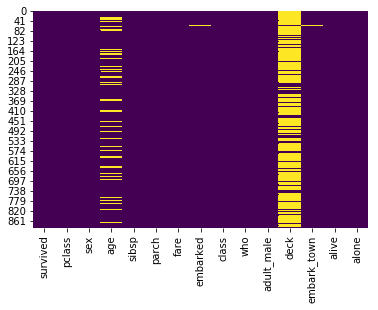

In [80]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [81]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

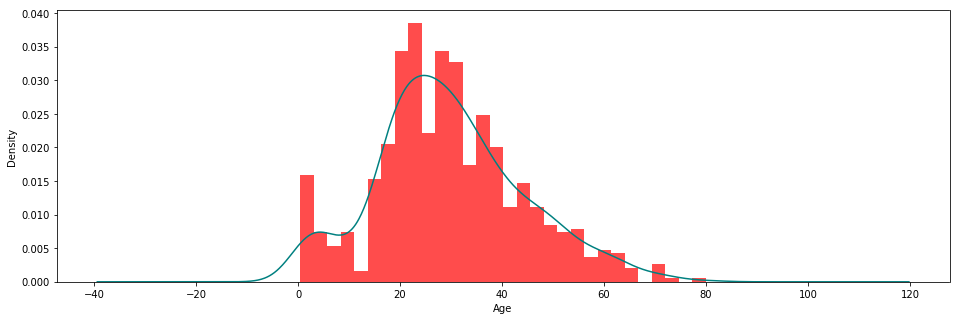

In [82]:
ax = titanic['age'].hist(bins = 30, density = True, color ='red', alpha = 0.7, figsize=(16,5))
titanic['age'].plot(kind ='density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

In [83]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

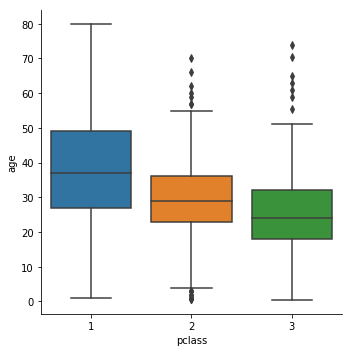

In [84]:
sns.catplot(x = 'pclass', y ='age', data = titanic, kind = 'box')

In [85]:
titanic[titanic['pclass'] == 1] ['age'].mean()

38.233440860215055

In [86]:
titanic[titanic['pclass'] == 2] ['age'].mean()

29.87763005780347

In [87]:
titanic[titanic['pclass'] == 3] ['age'].mean()

25.14061971830986

In [88]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age
        

In [89]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)

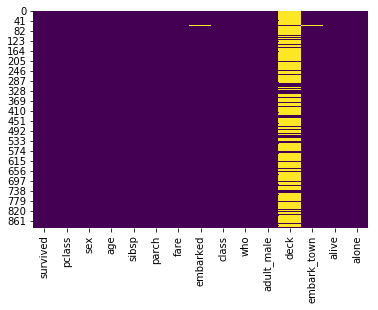

In [90]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

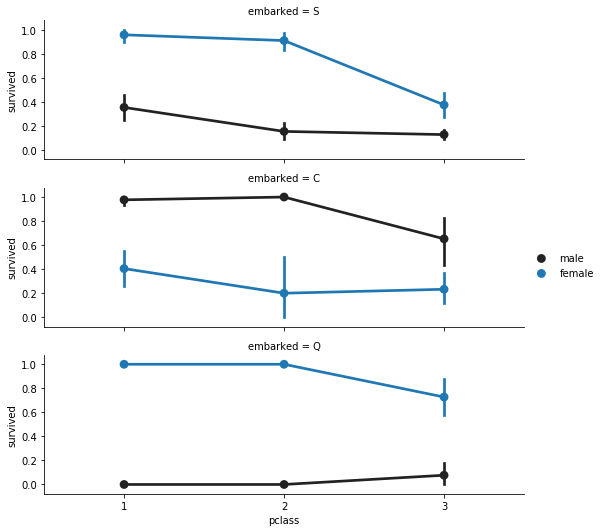

In [91]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect =3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [92]:
titanic['embarked'].isnull().sum()

2

In [93]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [94]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [95]:
titanic['embarked'].isnull().sum()

0

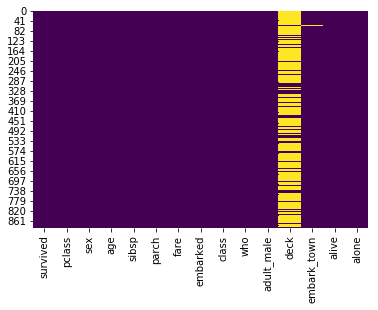

In [96]:
sns.heatmap(titanic.isnull(), cbar = False, cmap='viridis')

In [97]:
titanic.drop(labels = ['deck','embark_town','alive'], inplace = True, axis =1)

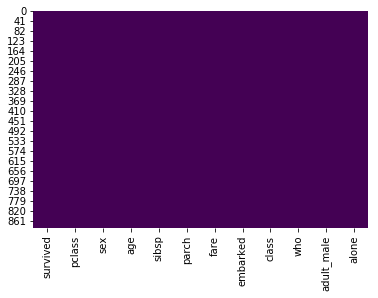

In [98]:
sns.heatmap(titanic.isnull(), cbar = False, cmap ='viridis')

In [99]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [100]:
titanic['fare']= titanic['fare'].astype('int')
titanic['age']= titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


# convert categorical data to numerical data

In [101]:
gender={'male':0, 'female':1}
titanic['sex']= titanic['sex'].map(gender)

In [102]:
adult_male = {True:1, False:0}
titanic['adult_male']= titanic['adult_male'].map(adult_male)

In [103]:
alone={True:1, False:0}
titanic['alone']=titanic['alone'].map(alone)

In [104]:
ports = {'S':0, 'Q':1,'C':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [105]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,man,1,0
1,1,1,1,38,1,0,71,2,First,woman,0,0
2,1,3,1,26,0,0,7,0,Third,woman,0,1
3,1,1,1,35,1,0,53,0,First,woman,0,0
4,0,3,0,35,0,0,8,0,Third,man,1,1


In [107]:
titanic.drop(labels = ['class','who'], inplace = True, axis =1)

In [108]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,2,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


# Applying Logistic Regression on Survived

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [111]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [113]:
X_train.shape

(596, 9)

In [114]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [117]:
model.score(X_test, y_test)

0.8305084745762712